# Housing Prices Competition

Credit: https://www.kaggle.com/competitions/home-data-for-ml-course

In [135]:
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Cross-validation
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

SEED

In [137]:
np.random.seed(66)

## Load Dataset

In [138]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

## 1. Data walkthrough

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [140]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [141]:
cols_with_nulls = train_df.isnull().sum().sort_values(ascending=False)

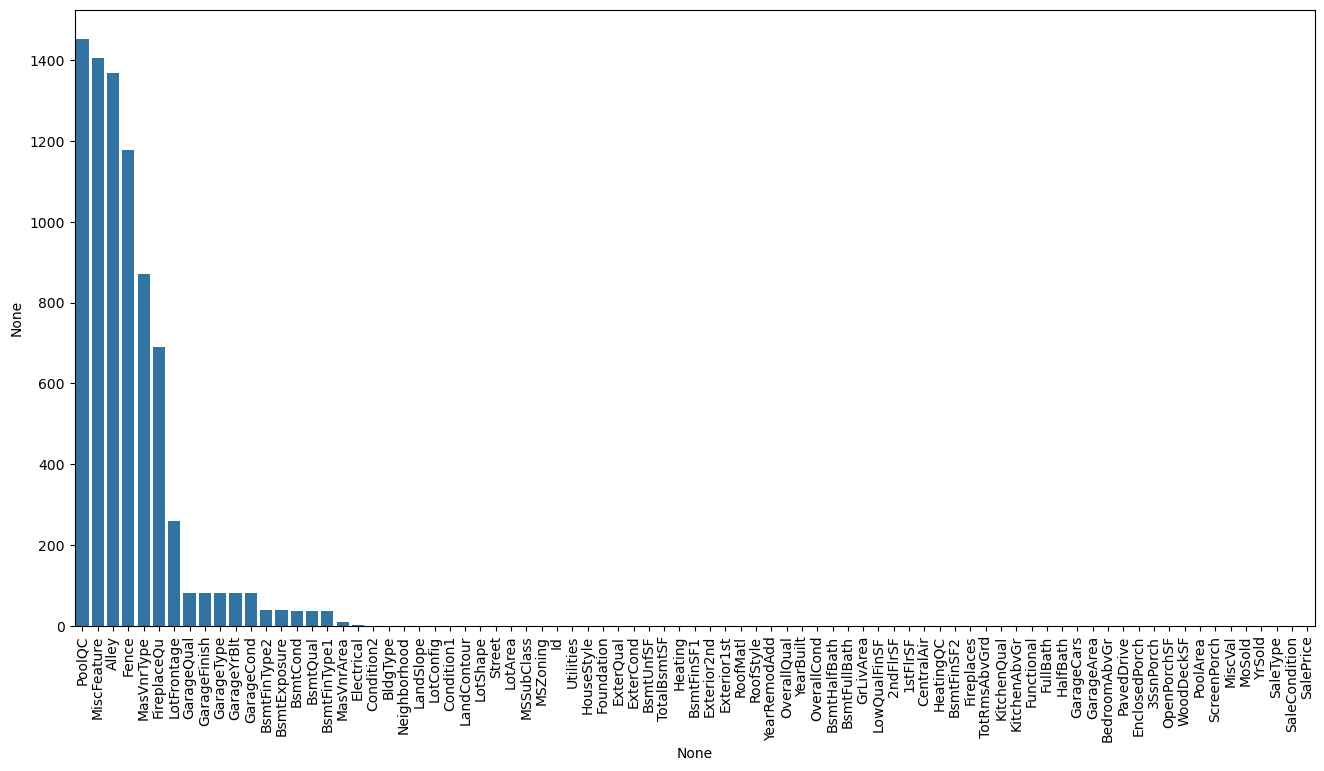

In [142]:
plt.figure(figsize=(16, 8))
sns.barplot(x=cols_with_nulls.index, y=cols_with_nulls)
plt.xticks(rotation=90)
plt.show()

### Important features

In [143]:
important_features = ['LotArea', 'Utilities', 'Street', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 
                      'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath','HalfBath', 'Fireplaces', 
                      'TotalBsmtSF', 'BsmtCond', 'GrLivArea', 'GarageArea',
                      'CentralAir', 'HeatingQC', 'Electrical', 'PoolArea', 'SalePrice']

In [144]:
filtered_train_df = train_df[important_features]

In [145]:
filtered_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   Utilities     1460 non-null   object
 2   Street        1460 non-null   object
 3   OverallCond   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   2ndFlrSF      1460 non-null   int64 
 7   TotRmsAbvGrd  1460 non-null   int64 
 8   BedroomAbvGr  1460 non-null   int64 
 9   KitchenAbvGr  1460 non-null   int64 
 10  FullBath      1460 non-null   int64 
 11  HalfBath      1460 non-null   int64 
 12  Fireplaces    1460 non-null   int64 
 13  TotalBsmtSF   1460 non-null   int64 
 14  BsmtCond      1423 non-null   object
 15  GrLivArea     1460 non-null   int64 
 16  GarageArea    1460 non-null   int64 
 17  CentralAir    1460 non-null   object
 18  HeatingQC     1460 non-null   object
 19  Electr

### Categorial Features

In [146]:
num_cols = filtered_train_df.select_dtypes(exclude='object').columns.tolist()
cat_cols = filtered_train_df.select_dtypes(include='object').columns.tolist()

In [147]:
print(cat_cols)

['Utilities', 'Street', 'BsmtCond', 'CentralAir', 'HeatingQC', 'Electrical']


1. Street is One-hot type
2. The rest are Ordinal type

## 2. Outliers

In [148]:
filtered_train_df.describe()

,LotArea,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,Fireplaces,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,5.575342,1971.267808,1162.626712,346.992466,6.517808,2.866438,1.046575,1.565068,0.382877,0.613014,1057.429452,1515.463699,472.980137,2.758904,180921.195890
std,9981.264932,1.112799,30.202904,386.587738,436.528436,1.625393,0.815778,0.220338,0.550916,0.502885,0.644666,438.705324,525.480383,213.804841,40.177307,79442.502883
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,882.000000,0.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,795.750000,1129.500000,334.500000,0.000000,129975.000000
50%,9478.500000,5.000000,1973.000000,1087.000000,0.000000,6.000000,3.000000,1.000000,2.000000,0.000000,1.000000,991.500000,1464.000000,480.000000,0.000000,163000.000000
75%,11601.500000,6.000000,2000.000000,1391.250000,728.000000,7.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1298.250000,1776.750000,576.000000,0.000000,214000.000000
max,215245.000000,9.000000,2010.000000,4692.000000,2065.000000,14.000000,8.000000,3.000000,3.000000,2.000000,3.000000,6110.000000,5642.000000,1418.000000,738.000000,755000.000000


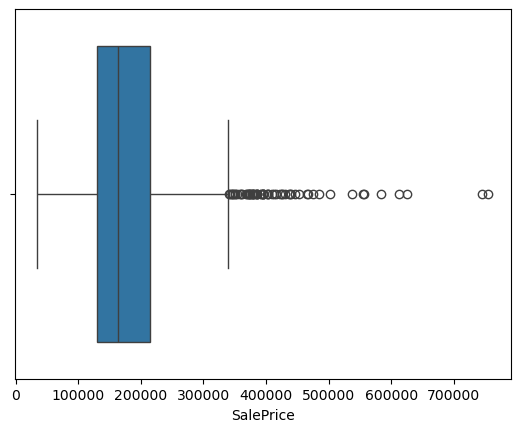

In [149]:
sns.boxplot(x=train_df['SalePrice'])
plt.show()

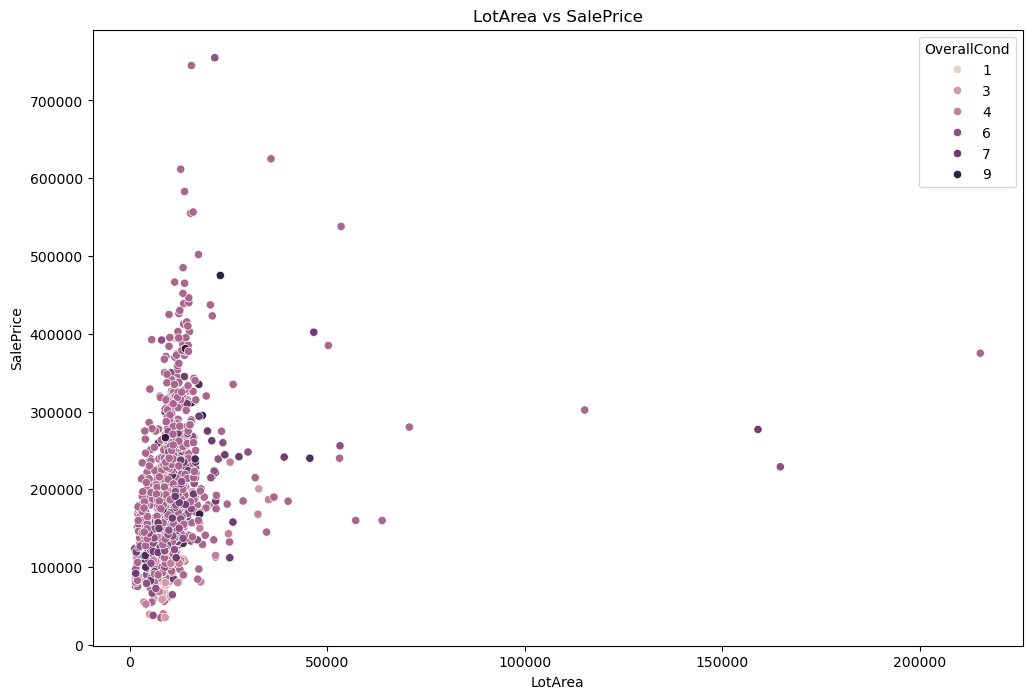

In [150]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=filtered_train_df['LotArea'], y=train_df['SalePrice'], hue=train_df['OverallCond'])
plt.title('LotArea vs SalePrice')
plt.show()

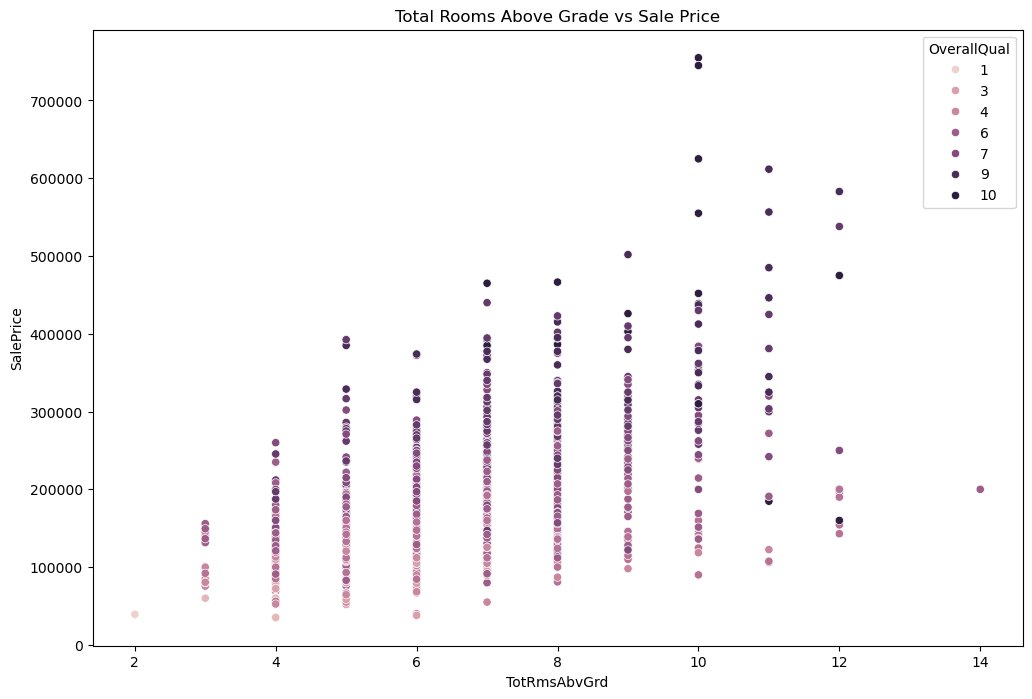

In [151]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=filtered_train_df['TotRmsAbvGrd'], y=train_df['SalePrice'], hue=train_df['OverallQual'])
plt.title('Total Rooms Above Grade vs Sale Price')
plt.show()

In [152]:
train_df['SalePrice'].quantile(0.9955)

np.float64(545386.5000000051)

In [153]:
sales_drop = filtered_train_df[filtered_train_df['SalePrice'] > filtered_train_df['SalePrice'].quantile(0.9955)].index
filtered_train_df.drop(sales_drop, inplace=True)

/tmp/ipykernel_804/1760320277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df.drop(sales_drop, inplace=True)


In [154]:
lotArea_drop = filtered_train_df[filtered_train_df['LotArea'] > 100_000].index
filtered_train_df.drop(lotArea_drop, inplace=True)

/tmp/ipykernel_804/1244373157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df.drop(lotArea_drop, inplace=True)


In [155]:
filtered_train_df.shape

(1449, 22)

## 3. Data Preprocessing

In [156]:
# Numerical Pipeline
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler())
])

In [157]:
# Categorical Pipeline
cat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [158]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)

    ],
    remainder='drop',
    n_jobs=-1
)

## 4. EDA

## 5. Cross-Validation

In [167]:
X = filtered_train_df.drop('SalePrice', axis=1)
y = filtered_train_df['SalePrice']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

### Pipeline

## 6. Modeling

In [160]:
model_gbr = GradientBoostingRegressor(n_estimators=100, loss='squared_error',
                                       learning_rate=0.05, random_state=66)

In [162]:
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_gbr)
])

In [163]:
gbr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallCond',
                                                   'YearBuilt', '1stFlrSF',
                                                   '2ndFlrSF', 'TotRmsAbvGrd',
                                                   'BedroomAbvGr',
                                                   'KitchenAbvGr', 'FullBath',
                                                   'HalfBath', 'Fireplaces',
                                                   'TotalBsmtSF', 'GrLivArea',
                                                   'GarageArea', 'PoolArea',
                                                   'SalePrice']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Utilities', 'Street',
                                                   'BsmtCond', 'CentralAir',
                                                   'HeatingQC',
                                                   'Electrical'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           random_state=66))])

In [169]:
gbr_pipeline.fit(X_train, y_train)
y_pred = gbr_pipeline.predict(X_test)

ValueError: A given column is not a column of the dataframe